In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
#gauss_legendre quadrature set
N=1024

quadrature_points, weights = np.polynomial.legendre.leggauss(N)

mu_n = np.array(quadrature_points)
w_n = np.array(weights)

print(mu_n)

[-0.99999725 -0.99998548 -0.99996433 ...  0.99996433  0.99998548
  0.99999725]


In [93]:
#given_data 
h = 0.001
x_j = np.arange(h/2,1, h)
x_jplushalf = np.arange(0, 15+h, h)

J = len(x_j)
alpha_n = np.zeros(N)
sigma_tj = np.ones(J)* 1
nu_sigmaf_j = np.ones(J) * 1
sigma_aj = np.ones(J)*0.2
sigma_s0j = sigma_tj -sigma_aj


In [94]:
def sn_sweep_1d(S_nj):
    
    J=len(x_j)
    flux_0j = np.zeros(J)
    flux_1j = np.zeros(J)
    psi_in = np.zeros(N)
    psi_out = np.zeros(N)
    psi_avg = np.zeros(N)

    for j in range(J):
        for n in range(int(N/2),N):
            psi_out[n] = (1 - (1-alpha_n[n])*sigma_tj[j]*h/(2*mu_n[n])) / (1 + (1+alpha_n[n])*sigma_tj[j]*h/(2*mu_n[n])) * psi_in[n] + (S_nj[n,j]*h / mu_n[n] )/ (1 + (1+alpha_n[n])*sigma_tj[j]*h/(2*mu_n[n] ))
            psi_avg[n] = (1+alpha_n[n])/2 * psi_out[n] + (1-alpha_n[n])/2 * psi_in[n]
            flux_0j[j] = flux_0j[j] + psi_avg[n] * w_n[n]
            flux_1j[j] = flux_1j[j] + psi_avg[n] * mu_n[n] * w_n[n]
            #print(psi_avg)
        psi_in = psi_out.copy()    

    reflection = 0
    
    psi_in[0:int(N/2)] = reflection * psi_in[int(N/2):N]
    #print('left',psi_in)
    for j in reversed(range(J)):
        for n in range(0,int(N/2)):
            psi_out[n] = (1 + (1+alpha_n[n])*sigma_tj[j]*h/(2*mu_n[n])) / (1 - (1-alpha_n[n])*sigma_tj[j]*h/(2*mu_n[n])) * psi_in[n] - (S_nj[n,j]*h / mu_n[n] )/ (1 - (1-alpha_n[n])*sigma_tj[j]*h/(2*mu_n[n] ))
            psi_avg[n] = (1-alpha_n[n])/2 * psi_out[n] + (1+alpha_n[n])/2 * psi_in[n]
            flux_0j[j] = flux_0j[j] + psi_avg[n] * w_n[n]
            flux_1j[j] = flux_1j[j] + psi_avg[n] * mu_n[n] * w_n[n]
    #        print(psi_avg)
        psi_in = psi_out.copy()

    return flux_0j , flux_1j 

0.23054202012181757
keff= 1.0974447805331928
0.09978729103104733
keff= 1.157696436316545
0.04573200869028149
keff= 1.1909127522717926
0.02115889496006118
keff= 1.20837996867347
0.009957229263684253
keff= 1.2173445236137137
0.004759314365569978
keff= 1.221882201412486
0.002301962670951063
keff= 1.2241602341386673
0.0011226488576763227
keff= 1.2252981049307965
0.0005505302551132019
keff= 1.2258646834612634
0.00027093862193861007
keff= 1.2261462419053462
0.00013364569481044697
keff= 1.2262859861490036
6.601941719308613e-05
keff= 1.2263552895583731
3.264298127336751e-05
keff= 1.226389641872026
1.6149625419181746e-05
keff= 1.22640666415056
7.992755023833453e-06
keff= 1.226415097310248
3.956698839013839e-06
keff= 1.2264192747109337
1.9590005884140282e-06
keff= 1.226421343830943
9.700129108836109e-07
keff= 1.2264223686379385


<function matplotlib.pyplot.show(close=None, block=None)>

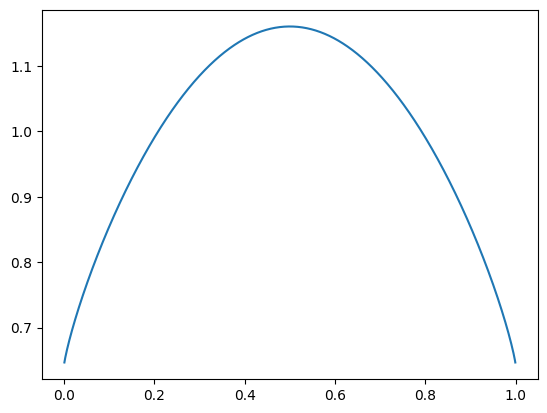

In [95]:
sigma_s1 = 0

flux_1j_old = np.zeros(len(x_j))
flux_0j_new = np.zeros(len(x_j))
flux_1j_new = np.zeros(len(x_j))

S_nj = np.zeros((N,len(x_j)))
#Q_j = np.ones(len(x_j))* 100

keff_old = 1
keff_new= 0
flux_0j_old = np.ones(J) * (sum(nu_sigmaf_j*h)**-1)

err = np.inf
del_keff = np.inf
while(err>10**-6 and del_keff>10**-8):

    for n in range(N):
            S_nj[n,:] = 1/2 * (sigma_s0j * flux_0j_old + 1/keff_old*nu_sigmaf_j*flux_0j_old)  + 3/2*mu_n[n]*sigma_s1*flux_1j_old
    
    flux_0j_new, flux_1j_new = sn_sweep_1d(S_nj)
    err = max(abs((flux_0j_old-flux_0j_new)))

    keff_new  = keff_old*sum(nu_sigmaf_j*flux_0j_new*h) 
    flux_0j_old = flux_0j_new*keff_old/keff_new
    del_keff = abs(keff_new-keff_old)

    keff_old = keff_new
    print(err)
    print('keff=', keff_new)
    

plt.plot(x_j,flux_0j_new)

plt.show


In [96]:
flux_0j_new

array([0.6467479 , 0.65076685, 0.65437471, 0.65772863, 0.66091374,
       0.66397768, 0.66694835, 0.66984308, 0.67267335, 0.67544728,
       0.67817096, 0.68084923, 0.68348602, 0.68608462, 0.68864788,
       0.69117823, 0.69367782, 0.69614854, 0.69859207, 0.7010099 ,
       0.70340338, 0.70577372, 0.70812202, 0.71044926, 0.71275637,
       0.71504416, 0.71731341, 0.71956481, 0.72179902, 0.72401664,
       0.72621823, 0.7284043 , 0.73057534, 0.73273181, 0.73487412,
       0.73700269, 0.73911789, 0.74122007, 0.74330956, 0.74538668,
       0.74745173, 0.74950499, 0.75154673, 0.7535772 , 0.75559665,
       0.75760531, 0.7596034 , 0.76159112, 0.76356868, 0.76553627,
       0.76749407, 0.76944225, 0.77138099, 0.77331045, 0.77523078,
       0.77714213, 0.77904463, 0.78093844, 0.78282367, 0.78470046,
       0.78656893, 0.78842919, 0.79028137, 0.79212556, 0.79396188,
       0.79579042, 0.79761129, 0.79942458, 0.80123038, 0.80302878,
       0.80481987, 0.80660373, 0.80838045, 0.81015009, 0.81191